### 시도별 화재발생 현황

* 년도별 화재건수에 따른 피해자(사망/부상)
* 지역별 재산피해 total / 부동산 / 동산
* 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

current_font_list = matplotlib.rcParams['font.family']

font_path = "C:\Windows\Fonts\HMFMMUEX.TTC"
kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rcParams['font.family'] = [kfont] + current_font_list

pd_data = pd.read_csv('시도별_화재발생_현황_총괄__20230307153255.csv', encoding='cp949')
pd_data.head()
# print(pd_data.dtypes)

pd_data['사망 (명)'] = pd_data['사망 (명)'].replace('-', 0)

pd_data['사망 (명)'] = pd_data['사망 (명)'].astype('int64')
print(pd_data.dtypes)
pd_data['사망 (명)'].unique()

시점               int64
행정구역별           object
건수 (건)           int64
사망 (명)           int64
부상 (명)           int64
재산피해(계) (천원)     int64
부동산 (천원)         int64
동산 (천원)          int64
이재가구수 (가구)       int64
이재민수 (명)         int64
dtype: object


array([304,  42,  19,  12,  15,   7,   3,  62,  13,  18,  20,  10,  28,
        24,   4, 263,  29,  21,  16,   1,   6,  67,  17,   5, 267,  31,
        26,  61,   8,  11, 307,  22,  14,   9,   2,  54,  30, 325,  36,
        77,  43, 253,  27,  63, 306,  40,  70, 345,  37,  78,  41, 369,
        53,  56, 285,   0,  47,  33,  23, 365, 114, 276,  66], dtype=int64)

In [3]:
n_data = pd_data[pd_data['행정구역별'] == '전국']
r_data = pd_data[pd_data['행정구역별'] != '전국']

# print(r_data[0:20])

(-0.5, 11.5)


Text(0, 0.5, '사망 (명) / 부상 (명)')

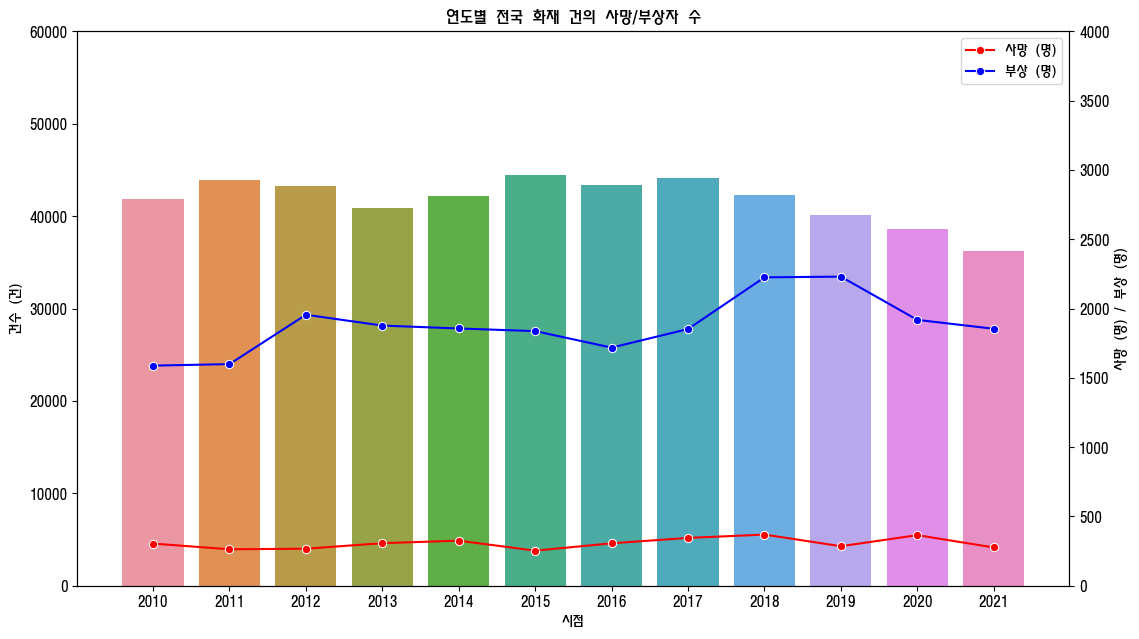

In [4]:
pd_data['부상 (명)/5'] = pd_data['부상 (명)'] / 5
# print(n_data['부상 (명)/10'])

fig, ax = plt.subplots(figsize=(6.4*2, 4.8*1.5))

bar_x = sns.barplot(data=n_data, x='시점', y='건수 (건)')
bar_x.set_ylim(0, 60000)
bar_x.set_title('연도별 전국 화재 건의 사망/부상자 수')
print(bar_x.get_xlim())

ax2 = bar_x.twinx()
sns.lineplot(data=n_data, x=np.linspace(0, 11, 12), y='사망 (명)',  marker='o', color='red', label='사망 (명)', ax=ax2)
sns.lineplot(data=n_data, x=np.linspace(0, 11, 12), y='부상 (명)',  marker='o', color='blue', label='부상 (명)', ax=ax2)
ax2.set_ylim(0, 4000)
ax2.set_ylabel('사망 (명) / 부상 (명)')
# ax2.set_xlim(ax.get_xlim())

       시점 행정구역별  건수 (건)  사망 (명)  부상 (명)  재산피해(계) (천원)   부동산 (천원)    동산 (천원)  \
0    2010    전국   41863     304    1588     266776332  117808118  148968214   
17   2011    전국   43875     263    1599     256547614  113257928  143289686   
34   2012    전국   43249     267    1955     289493719  127500018  161993701   
52   2013    전국   40932     307    1877     434462330  178812680  255649650   
70   2014    전국   42135     325    1856     405356513  168824616  236531897   
88   2015    전국   44435     253    1837     433165072  172436683  260728389   
106  2016    전국   43413     306    1718     420603245  163024911  257578334   
124  2017    전국   44178     345    1852     506913578  209853077  297060501   
142  2018    전국   42338     369    2225     559735728  233979583  325756145   
160  2019    전국   40103     285    2230     858496234  311283934  547212300   
178  2020    전국   38659     365    1918     600475432  226754018  373721414   
196  2021    전국   36267     276    1854    109912498

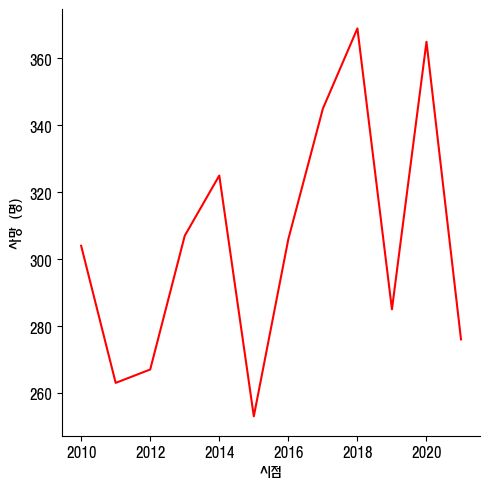

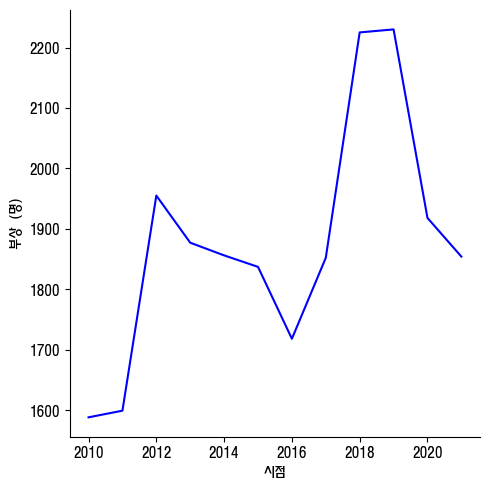

In [5]:
sns.relplot(data=n_data, x='시점', y='사망 (명)', color='red', label='사망 (명)', kind='line')
print(n_data)
sns.relplot(data=n_data, x='시점', y='부상 (명)', color='blue', label='부상 (명)', kind='line')

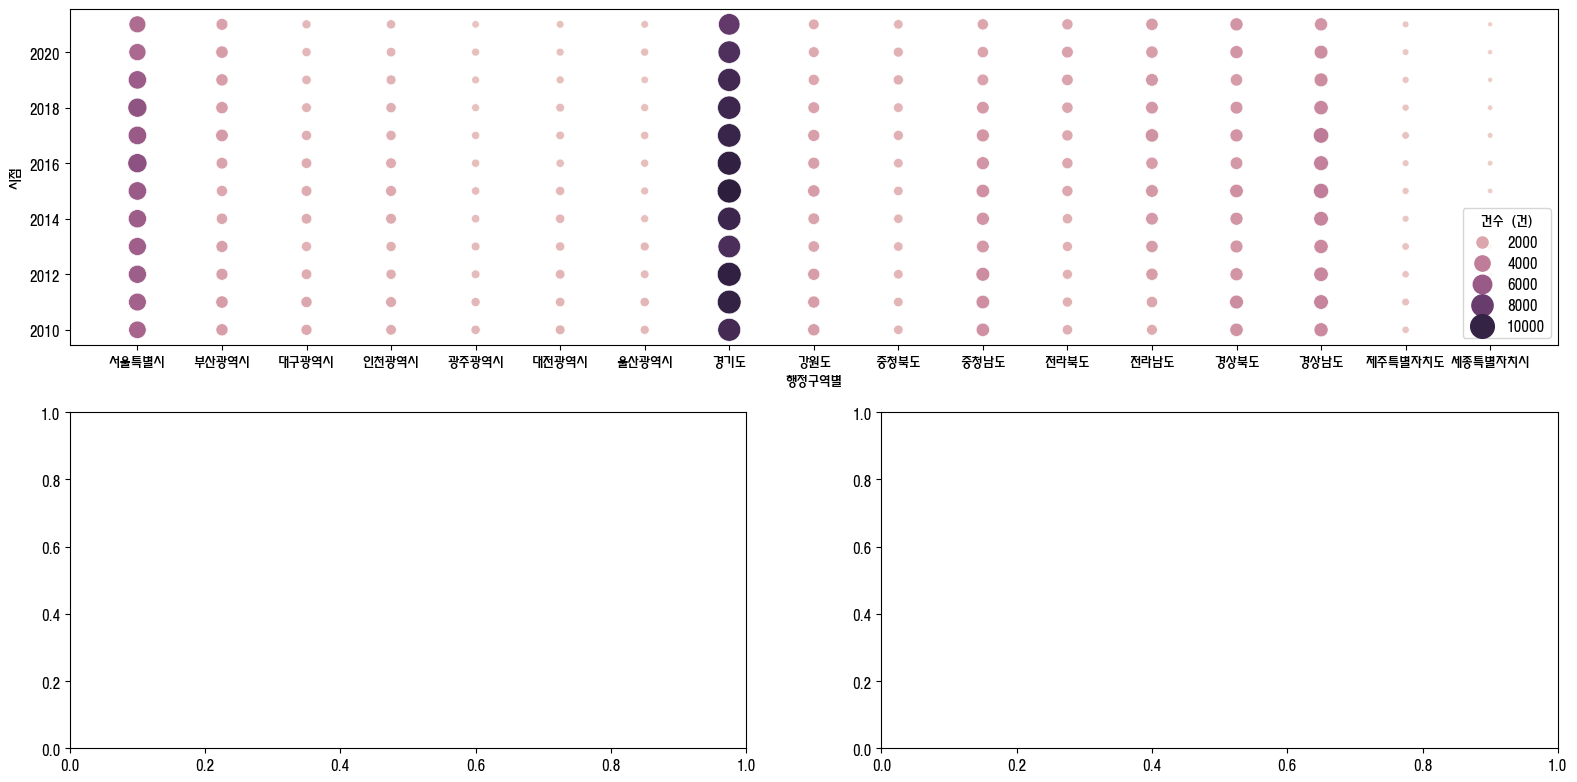

In [6]:
# 지역별 재산피해 total / 부동산 / 동산

fig = plt.figure(figsize=(6.4*3, 4.8*2)) 

left = fig.add_subplot(2,1,1)
sns.scatterplot(data=r_data, x='행정구역별', y='시점', hue='건수 (건)', size="건수 (건)", sizes=(10, 300), ax=left)

# left.set_xlim(2007, 2022)
# fig.subplots_adjust(left=-0.3, right=0.9)

right_top = fig.add_subplot(2,2,3)

right_bot = fig.add_subplot(2,2,4)

C:\Users\81628\AppData\Local\Temp\ipykernel_17868\843449725.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df1 = r_data.pivot("행정구역별", "시점", "사망 (명)")


<AxesSubplot: xlabel='시점', ylabel='행정구역별'>

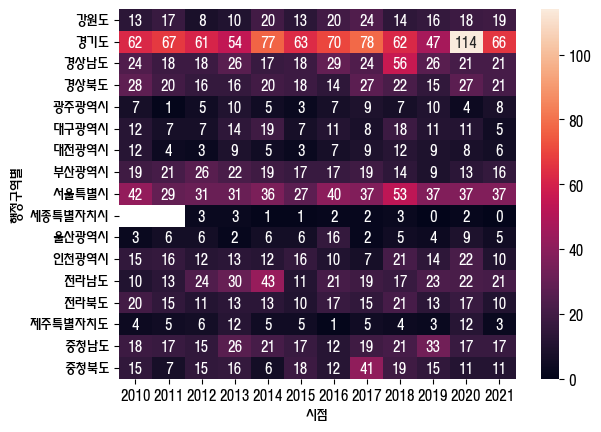

In [7]:
# heatmap

df1 = r_data.pivot("행정구역별", "시점", "사망 (명)")
sns.heatmap(df1, annot=True, fmt=".0f")